# **Physical Capability Data - Exploratory Data Analysis**

*Physical Capability is measured using a battery of tests which measure different qualities and expressions of force.
The dataset provided contains the longitudinal data for 1 player for the past 2+ seasons. The data has been aggregated to the MOVEMENT, QUALITY and EXPRESSION level,
so scores are not available for the specific tests and metrics that lie in the layers underneath.
Where sufficient data exists, the “BenchmarkPct” value will be available. This is a pre-calculated aggregate expressed as a percentage. There is 1 row per
movement/quality/expression per day. If no new data has been recorded on a given day, data from the previous day is carried forward.*

This notebook is organized in the following sections:

* [Part 0 - Preliminary Steps](#0)
    * [Part 0.1 - Importing the Necessary Libraries](#0.1)
    * [Part 0.2 - Reading the Physical Capability Data Dataset](#0.2)

* [Part 1 - Data Cleaning](#1)
    * [Part 1.1 - Preliminary Analysis of the Dataset](#1.1)
    * [Part 1.2 - Dealing with Duplicates](#1.2)
    * [Part 1.3 - Ensuring Correct Data Types](#1.3)
    * [Part 1.4 - Dealing with Null/Missing Values](#1.4)
    * [Part 1.5 - Creating New Columns to Enhance the Analysis](#1.5)
    * [Part 1.6 - Final Checks](#1.6)

* [Part 2 - Exploratory Data Analysis](#2)

<a id='0'></a>
## Part 0 - Preliminary Steps

<a id='0.1'></a>
### Part 0.1 - Importing the Necessary Libraries

In [1]:
import pandas as pd

<a id='0.2'></a>
### Part 0.2 - Reading the Physical Capability Data Dataset

In [3]:
physical_capability_data = pd.read_csv('CFC Physical Capability Data_ (1).csv')

<a id='1'></a>
## Part 1 - Data Cleaning

<a id='1.1'></a>
### Part 1.1 - Preliminary Analysis of the Dataset

In [4]:
physical_capability_data.head(20)

,testDate,expression,movement,quality,benchmarkPct
0,03/07/2023,isometric,upper body,pull,NaN
1,04/07/2023,dynamic,agility,acceleration,0.3200
2,10/07/2023,dynamic,agility,deceleration,0.8670
3,18/07/2023,isometric,jump,take off,NaN
4,20/07/2023,dynamic,upper body,pull,0.8525
5,30/07/2023,isometric,upper body,grapple,NaN
6,31/07/2023,isometric,jump,land,NaN
7,11/08/2023,isometric,sprint,acceleration,NaN
8,18/08/2023,dynamic,agility,deceleration,0.8680
9,25/08/2023,dynamic,upper body,push,0.4000


In [ ]:
#idea: it would be nice for every day to have the value of the different tests. especially as these can be carried forward

#would need to create a list of the possible combinations and perhaps use a rolling average (?)/ shift to replace null values here 

In [5]:
physical_capability_data.tail(50)

,testDate,expression,movement,quality,benchmarkPct
12350,16/04/2024,dynamic,jump,land,0.6550
12351,27/04/2024,isometric,agility,acceleration,0.5200
12352,15/05/2024,isometric,upper body,push,0.7040
12353,16/05/2024,dynamic,sprint,max velocity,0.6250
12354,17/05/2024,isometric,sprint,max velocity,0.1995
12355,18/05/2024,isometric,agility,deceleration,1.1365
12356,19/05/2024,isometric,upper body,grapple,NaN
12357,28/05/2024,dynamic,sprint,acceleration,0.4300
12358,02/06/2024,isometric,upper body,pull,NaN
12359,05/06/2024,isometric,upper body,pull,NaN


In [6]:
physical_capability_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   testDate      12400 non-null  object 
 1   expression    12400 non-null  object 
 2   movement      12400 non-null  object 
 3   quality       12400 non-null  object 
 4   benchmarkPct  9839 non-null   float64
dtypes: float64(1), object(4)
memory usage: 484.5+ KB


<a id='1.2'></a>
### Part 1.2 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [7]:
physical_capability_data.duplicated().any()

False

In [8]:
# Another check for duplicates - just in case
physical_capability_data.duplicated().sum()

0

<a id='1.3'></a>
### Part 1.3 - Ensuring Correct Data Types

Next, we proceeded to ensure whether the data types of all columns were correct/adequate

In [9]:
physical_capability_data.dtypes

testDate         object
expression       object
movement         object
quality          object
benchmarkPct    float64
dtype: object

Given the only column with the incorrect data type was the `testDate` (i.e., date) column, we proceeded to transform it to the correct format --> datetime format (%d/%m/%Y).

In [10]:
# Transforming the columns into the correct data type

## Transforming the sessionDate column into datetime format
physical_capability_data['testDate'] = pd.to_datetime(physical_capability_data['testDate'], format = '%d/%m/%Y')

In [23]:
physical_capability_data.dtypes

testDate        datetime64[ns]
expression              object
movement                object
quality                 object
benchmarkPct           float64
dtype: object

<a id='1.4'></a>
### Part 1.4 - Dealing with Null/Missing Values

In [11]:
physical_capability_data.isna().sum()

testDate           0
expression         0
movement           0
quality            0
benchmarkPct    2561
dtype: int64

In [12]:
(physical_capability_data.isna().sum() / len(physical_capability_data)) * 100

testDate         0.000000
expression       0.000000
movement         0.000000
quality          0.000000
benchmarkPct    20.653226
dtype: float64

<a id='1.5'></a>
### Part 1.5 - Creating New Columns to Enhance the Analysis

<a id='1.6'></a>
### Part 1.6 - Final Checks

<a id='2'></a>
## Part 2 - Exploratory Data Analysis

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Set display options
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load data
df = pd.read_csv("CFC Physical Capability Data_ (1).csv")
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Shape of dataset: (12400, 5)

Columns: ['testDate', 'expression', 'movement', 'quality', 'benchmarkPct']


,testDate,expression,movement,quality,benchmarkPct
0,03/07/2023,isometric,upper body,pull,NaN
1,04/07/2023,dynamic,agility,acceleration,0.3200
2,10/07/2023,dynamic,agility,deceleration,0.8670
3,18/07/2023,isometric,jump,take off,NaN
4,20/07/2023,dynamic,upper body,pull,0.8525


In [ ]:
#Basic Descriptive Overview

print("Shape of the dataset:", df.shape)
print("\nData preview:")
print(df.head())

print("\nDescriptive statistics for numeric columns:")
print(df.describe())

print("\nUnique values per categorical column:")
for col in ['expression', 'movement', 'quality']:
    print(f"{col}: {df[col].nunique()} unique values")



Shape of the dataset: (12400, 5)

Data preview:
     testDate expression    movement       quality  benchmarkPct
0  03/07/2023  isometric  upper body          pull           NaN
1  04/07/2023    dynamic     agility  acceleration        0.3200
2  10/07/2023    dynamic     agility  deceleration        0.8670
3  18/07/2023  isometric        jump      take off           NaN
4  20/07/2023    dynamic  upper body          pull        0.8525

Descriptive statistics for numeric columns:
       benchmarkPct
count   9839.000000
mean       0.641032
std        0.194371
min       -0.200000
25%        0.490000
50%        0.648000
75%        0.772000
max        1.148000

Unique values per categorical column:
expression: 2 unique values
movement: 4 unique values
quality: 10 unique values


In [26]:
#Missing values and duplicates

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())



Missing values per column:
testDate           0
expression         0
movement           0
quality            0
benchmarkPct    2561
dtype: int64

Duplicate rows: 0


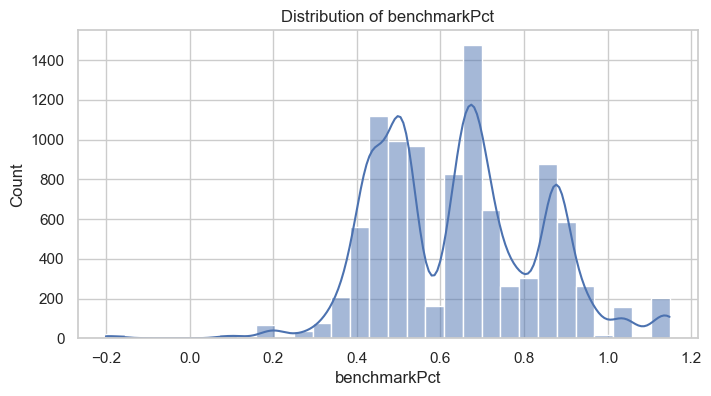

In [27]:
#benchmarkPct without nulls

if df['benchmarkPct'].notnull().any():
    plt.figure(figsize=(8, 4))
    sns.histplot(df['benchmarkPct'].dropna(), kde=True, bins=30)
    plt.title("Distribution of benchmarkPct")
    plt.xlabel("benchmarkPct")
    plt.show()
else:
    print("No benchmarkPct data available for distribution analysis.")



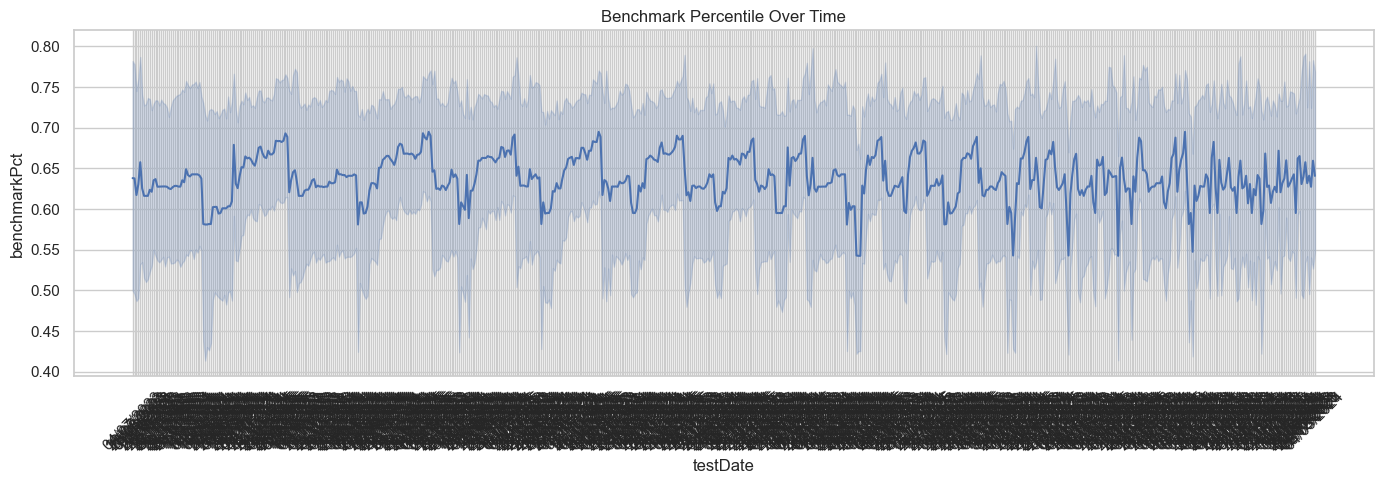

In [28]:
#trend over time

df_benchmark = df.dropna(subset=['benchmarkPct'])

if not df_benchmark.empty:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=df_benchmark, x='testDate', y='benchmarkPct')
    plt.title("Benchmark Percentile Over Time")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid rows with benchmarkPct for time series analysis.")



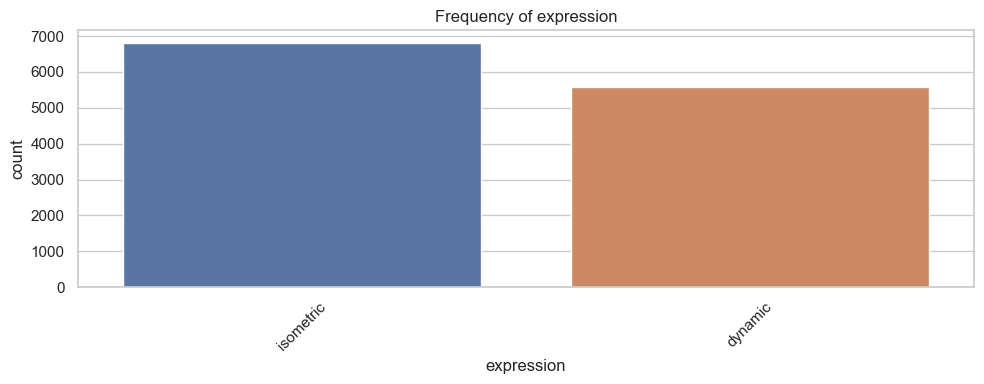

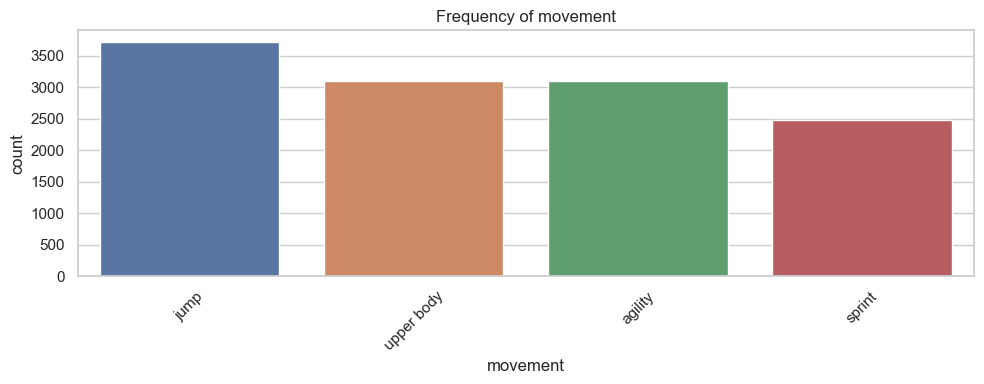

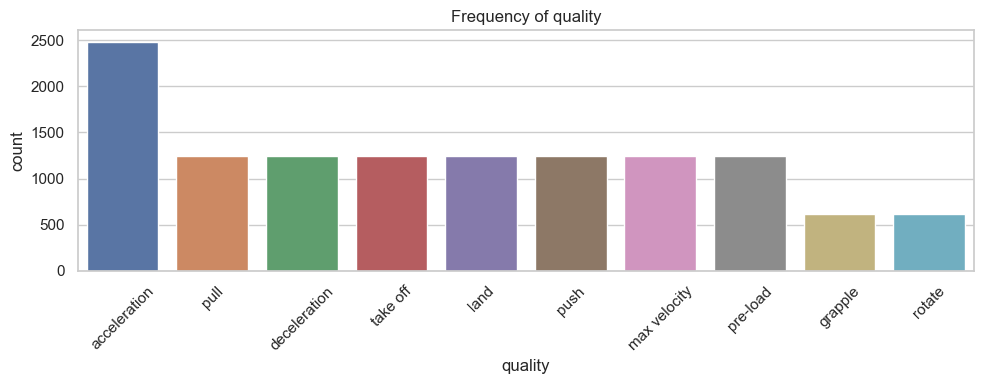

In [29]:
for col in ['expression', 'movement', 'quality']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


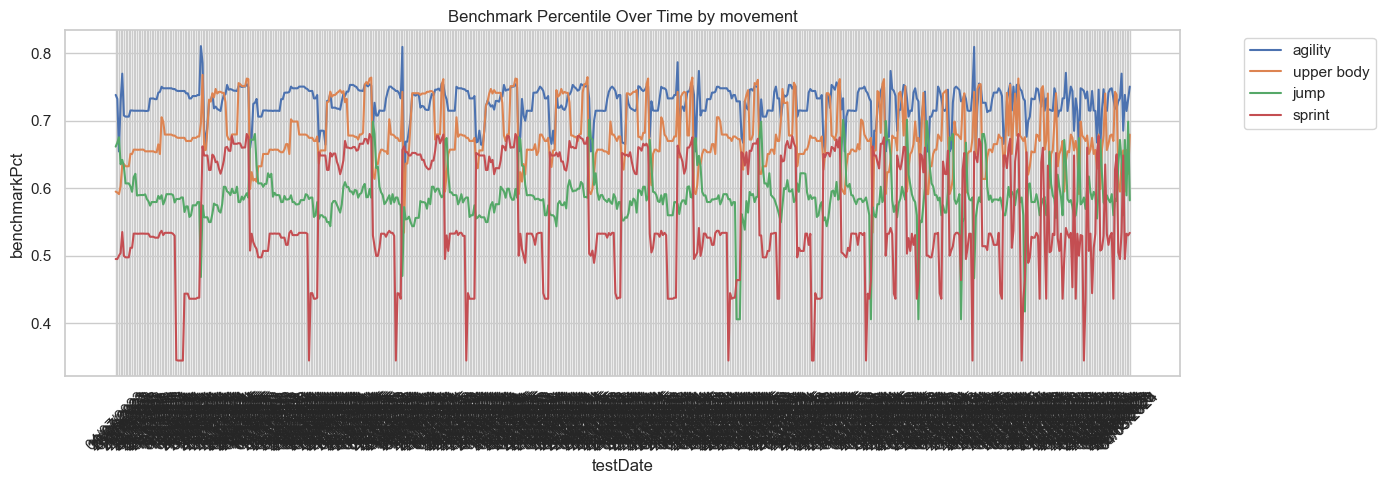

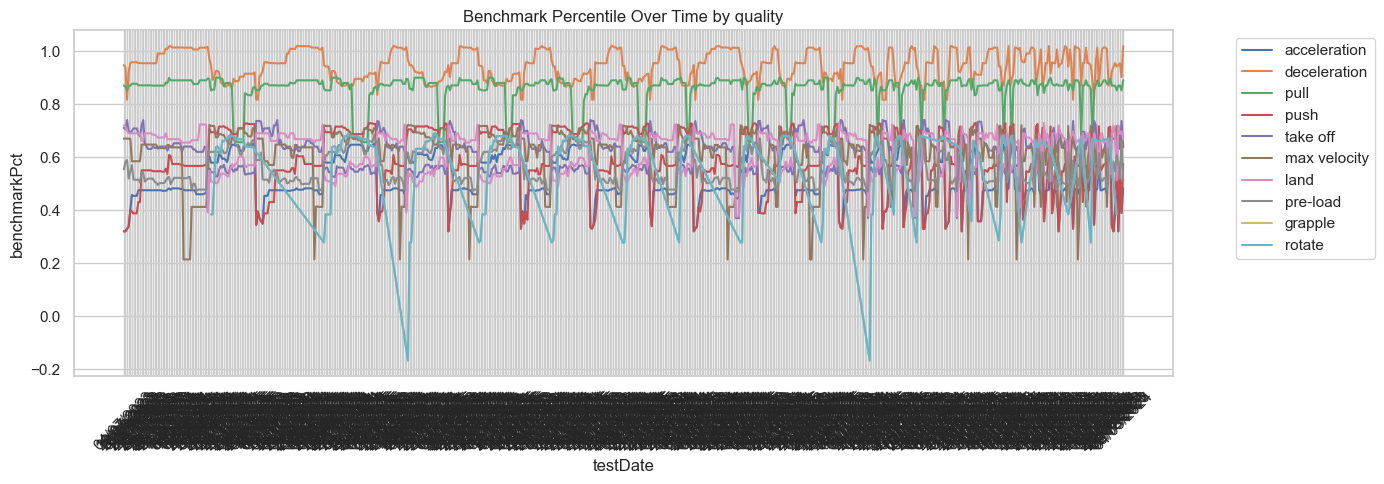

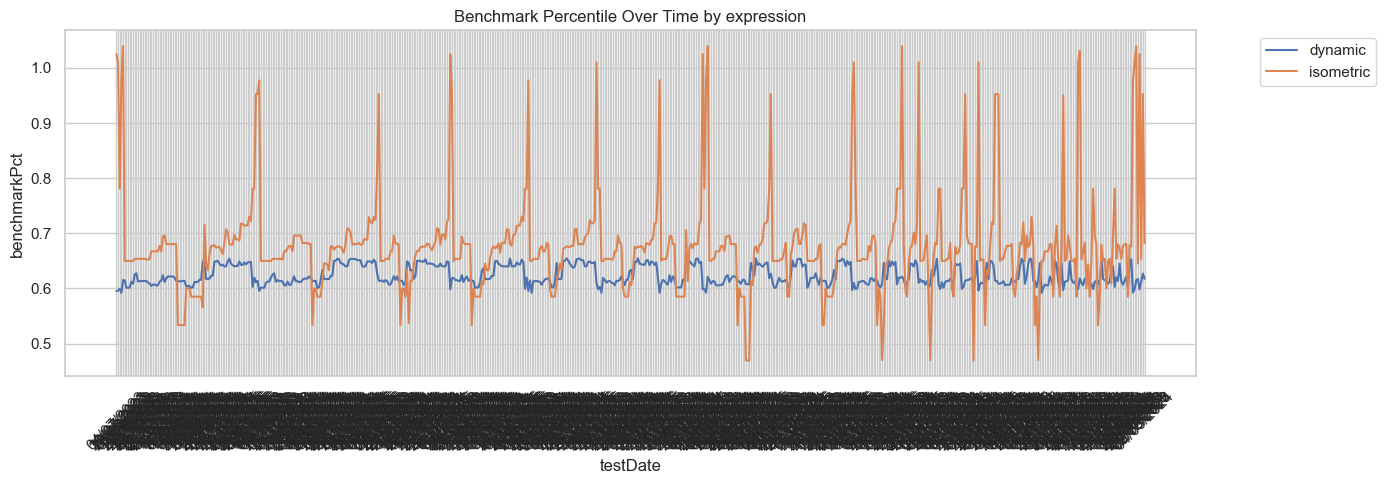

In [30]:
for col in ['movement', 'quality', 'expression']:
    if not df_benchmark.empty:
        plt.figure(figsize=(14, 5))
        sns.lineplot(data=df_benchmark, x='testDate', y='benchmarkPct', hue=col, errorbar=None)
        plt.title(f"Benchmark Percentile Over Time by {col}")
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


In [31]:
summary = df_benchmark.groupby(['movement', 'quality', 'expression'])['benchmarkPct'] \
                      .agg(['count', 'mean', 'std', 'min', 'max']) \
                      .sort_values(by='count', ascending=False)

print("\nGrouped stats for movement-quality-expression combos:")
print(summary.head(10))



Grouped stats for movement-quality-expression combos:
                                    count      mean       std     min     max
movement   quality      expression                                           
agility    acceleration dynamic       620  0.444102  0.042666  0.3200  0.5000
sprint     max velocity dynamic       620  0.645911  0.027614  0.5705  0.7020
agility    deceleration dynamic       620  0.876078  0.013553  0.8420  0.9000
                        isometric     620  1.015373  0.106288  0.7810  1.1480
upper body push         dynamic       620  0.444102  0.042666  0.3200  0.5000
jump       land         dynamic       620  0.684017  0.029140  0.6410  0.7465
upper body pull         dynamic       620  0.876078  0.013553  0.8420  0.9000
jump       pre-load     dynamic       620  0.520514  0.040775  0.4355  0.6620
           take off     dynamic       620  0.674946  0.036691  0.6195  0.7490
sprint     acceleration dynamic       620  0.444102  0.042666  0.3200  0.5000
